In [2]:
import mne


In [3]:
from mne.datasets import sample
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
print(raw_fname)

Using default location ~/mne_data for sample...
Creating ~/mne_data



Verifying hash 12b75d1cb7df9dfb4ad73ed82f61094f.
Decompressing the archive: C:\Users\HP\mne_data\MNE-sample-data-processed.tar.gz
(please be patient, this can take some time)
Successfully extracted to: ['C:\\Users\\HP\\mne_data\\MNE-sample-data']
Attempting to create new mne-python configuration file:
C:\Users\HP\.mne\mne-python.json
C:\Users\HP\mne_data\MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif


In [4]:
raw = mne.io.Raw(raw_fname)
print(raw)
print(raw.info)

Opening raw data file C:\Users\HP\mne_data\MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~3.7 MB, data not loaded>
<Info | 15 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 GRAD, 102 MAG, 9 STIM, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG refe

In [5]:
print(raw.ch_names)

['MEG 0113', 'MEG 0112', 'MEG 0111', 'MEG 0122', 'MEG 0123', 'MEG 0121', 'MEG 0132', 'MEG 0133', 'MEG 0131', 'MEG 0143', 'MEG 0142', 'MEG 0141', 'MEG 0213', 'MEG 0212', 'MEG 0211', 'MEG 0222', 'MEG 0223', 'MEG 0221', 'MEG 0232', 'MEG 0233', 'MEG 0231', 'MEG 0243', 'MEG 0242', 'MEG 0241', 'MEG 0313', 'MEG 0312', 'MEG 0311', 'MEG 0322', 'MEG 0323', 'MEG 0321', 'MEG 0333', 'MEG 0332', 'MEG 0331', 'MEG 0343', 'MEG 0342', 'MEG 0341', 'MEG 0413', 'MEG 0412', 'MEG 0411', 'MEG 0422', 'MEG 0423', 'MEG 0421', 'MEG 0432', 'MEG 0433', 'MEG 0431', 'MEG 0443', 'MEG 0442', 'MEG 0441', 'MEG 0513', 'MEG 0512', 'MEG 0511', 'MEG 0523', 'MEG 0522', 'MEG 0521', 'MEG 0532', 'MEG 0533', 'MEG 0531', 'MEG 0542', 'MEG 0543', 'MEG 0541', 'MEG 0613', 'MEG 0612', 'MEG 0611', 'MEG 0622', 'MEG 0623', 'MEG 0621', 'MEG 0633', 'MEG 0632', 'MEG 0631', 'MEG 0642', 'MEG 0643', 'MEG 0641', 'MEG 0713', 'MEG 0712', 'MEG 0711', 'MEG 0723', 'MEG 0722', 'MEG 0721', 'MEG 0733', 'MEG 0732', 'MEG 0731', 'MEG 0743', 'MEG 0742', 'ME

(376, 2252)
(2252,)


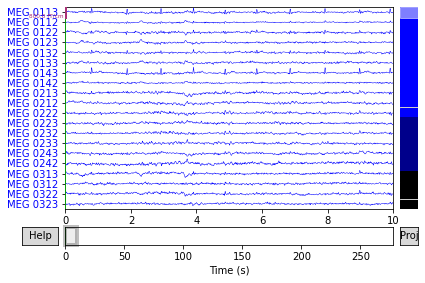

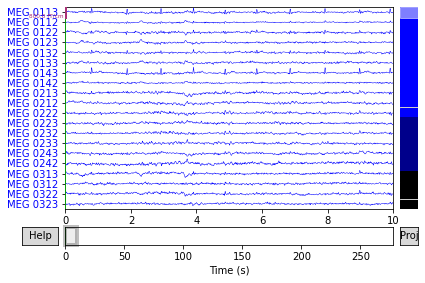

In [6]:
start, stop = raw.time_as_index([100, 115])  # 100 s to 115 s data segment
data, times = raw[:, start:stop]
print(data.shape)
print(times.shape)
data, times = raw[2:20:3, start:stop]  # access underlying data
raw.plot()

In [7]:
picks = mne.pick_types(raw.info, meg=True, eeg=False, stim=True,
                       exclude='bads')
raw.save('sample_audvis_meg_raw.fif', tmin=0, tmax=150, picks=picks,
         overwrite=True)

Writing G:\Python\Python37\Scripts\EEG- Emotions\sample_audvis_meg_raw.fif
Closing G:\Python\Python37\Scripts\EEG- Emotions\sample_audvis_meg_raw.fif
[done]


In [8]:
events = mne.find_events(raw, stim_channel='STI 014')
print(events[:5])

319 events found
Event IDs: [ 1  2  3  4  5 32]
[[6994    0    2]
 [7086    0    3]
 [7192    0    1]
 [7304    0    4]
 [7413    0    2]]


In [9]:
mne.set_config('MNE_STIM_CHANNEL', 'STI101')

In [10]:
event_id = dict(aud_l=1, aud_r=2)  # event trigger and conditions
tmin = -0.2  # start of each epoch (200ms before the trigger)
tmax = 0.5  # end of each epoch (500ms after the trigger)

In [11]:
raw.info['bads'] += ['MEG 2443', 'EEG 053']

In [12]:
picks = mne.pick_types(raw.info, meg=True, eeg=True, eog=True, stim=False,
                       exclude='bads')

In [13]:
baseline = (None, 0)  # means from the first instant to t = 0

In [14]:
reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)

In [15]:
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                    baseline=baseline, preload=False, reject=reject)
print(epochs)

Not setting metadata
Not setting metadata
145 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 4)
4 projection items activated
<Epochs |  145 events (good & bad), -0.199795 - 0.499488 sec, baseline [None, 0], ~3.6 MB, data not loaded,
 'aud_l': 72
 'aud_r': 73>


In [16]:
epochs_data = epochs['aud_l'].get_data()
print(epochs_data.shape)

Loading data for 72 events and 106 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
17 bad epochs dropped
(55, 365, 106)


In [17]:
from scipy import io
io.savemat('epochs_data.mat', dict(epochs_data=epochs_data), oned_as='row')

In [18]:
epochs.save('sample-epo.fif')

Loading data for 145 events and 106 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch base

In [19]:
saved_epochs = mne.read_epochs('sample-epo.fif')

Reading sample-epo.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
116 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 4)
4 projection items activated


<Evoked | 'aud_l' (average, N=55), [-0.1998, 0.49949] sec, 364 ch, ~3.9 MB>


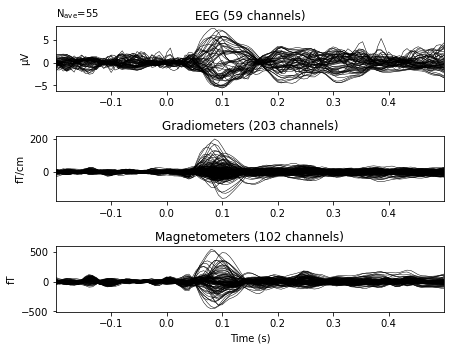

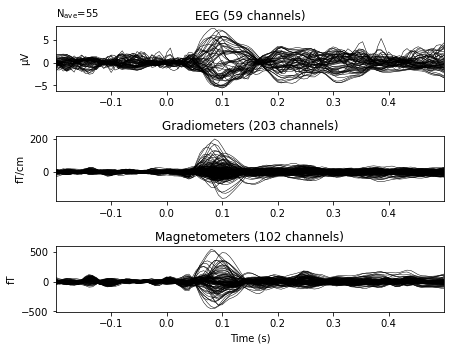

In [20]:
evoked = epochs['aud_l'].average()
print(evoked)
evoked.plot()

In [21]:
max_in_each_epoch = [e.max() for e in epochs['aud_l']] # doctest:+ELLIPSIS
print(max_in_each_epoch[:4]) # doctest:+ELLIPSIS

[1.937516720163134e-05, 1.6405516986429127e-05, 1.8545377810380145e-05, 2.0412807568093327e-05]


In [22]:
evoked_fname = data_path + '/MEG/sample/sample_audvis-ave.fif'
evoked1 = mne.read_evokeds(
    evoked_fname, condition='Left Auditory', baseline=(None, 0), proj=True)

Reading C:\Users\HP\mne_data\MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline correction (mode: mean)


In [23]:
evoked2 = mne.read_evokeds(
    evoked_fname, condition='Right Auditory', baseline=(None, 0), proj=True)

Reading C:\Users\HP\mne_data\MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Right Auditory)
        0 CTF compensation matrices available
        nave = 61 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline correction (mode: mean)


In [24]:
contrast = evoked1 - evoked2
print(contrast)

TypeError: unsupported operand type(s) for -: 'Evoked' and 'Evoked'

In [25]:
import numpy as np
n_cycles = 2  # number of cycles in Morlet wavelet
freqs = np.arange(7, 30, 3)  # frequencies of interest

In [26]:
from mne.time_frequency import tfr_morlet
power, itc = tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles,
                        return_itc=True, decim=3, n_jobs=1)
# power.plot()

Loading data for 116 events and 106 original time points ...


In [27]:
from mne.minimum_norm import apply_inverse, read_inverse_operator

In [28]:
fname_inv = data_path + '/MEG/sample/sample_audvis-meg-oct-6-meg-inv.fif'
inverse_operator = read_inverse_operator(fname_inv)

Reading inverse operator decomposition from C:\Users\HP\mne_data\MNE-sample-data/MEG/sample/sample_audvis-meg-oct-6-meg-inv.fif...
    Reading inverse operator info...
    [done]
    Reading inverse operator decomposition...
    [done]
    305 x 305 full covariance (kind = 1) found.
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Noise covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 2) found.
    Source covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 6) found.
    Orientation priors read.
    22494 x 22494 diagonal covariance (kind = 5) found.
    Depth priors read.
    Did not find the desired covariance matrix (kind = 3)
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing pat

In [29]:
snr = 3.0
lambda2 = 1.0 / snr ** 2
method = "dSPM"

In [30]:
stc = apply_inverse(evoked, inverse_operator, lambda2, method)

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 55
    Created the regularized inverter
    Created an SSP operator (subspace dimension = 3)
    Created the whitener using a noise covariance matrix with rank 302 (3 small eigenvalues omitted)
    Computing noise-normalization factors (dSPM)...
[done]
Applying inverse operator to "aud_l"...
    Picked 305 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ...
    Computing residual...
    Explained  59.3% variance
    Combining the current components...
    dSPM...
[done]


In [31]:
stc.save('mne_dSPM_inverse')

Writing STC to disk...
[done]


In [32]:
fname_label = data_path + '/MEG/sample/labels/Aud-lh.label'
label = mne.read_label(fname_label)

In [33]:
from mne.minimum_norm import apply_inverse_raw
start, stop = raw.time_as_index([0, 15])  # read the first 15s of data
stc = apply_inverse_raw(raw, inverse_operator, lambda2, method, label,
                        start, stop)

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 1
    Created the regularized inverter
    Created an SSP operator (subspace dimension = 3)
    Created the whitener using a noise covariance matrix with rank 302 (3 small eigenvalues omitted)
    Computing noise-normalization factors (dSPM)...
[done]
Applying inverse to raw...
    Picked 305 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ...
    combining the current components...
[done]


In [34]:
stc.save('mne_dSPM_raw_inverse_Aud')

Writing STC to disk...
[done]
